In [ ]:
import requests  
import pandas as pd  
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt 
import seaborn as sns 
from dotenv import load_dotenv
import os

load_dotenv()

sns.set_style("whitegrid")

Now lets get info from the The Movie DB API

In [3]:
API_KEY = os.getenv('API_KEY')
API_BASE_URL = 'https://api.themoviedb.org/3'


movie_data_list = []
for page in range(1, 11):
    url = f"{API_BASE_URL}/discover/movie?api_key={API_KEY}&primary_release_year=2025&sort_by=popularity.desc&page={page}"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        movie_data_list.extend(data['results'])
    else:
        print(f"Error fetching page {page}: {response.status_code}")
        break

print(movie_data_list)

[{'adult': False, 'backdrop_path': '/7QirCB1o80NEFpQGlQRZerZbQEp.jpg', 'genre_ids': [10749, 18], 'id': 1156594, 'original_language': 'es', 'original_title': 'Culpa nuestra', 'overview': "Jenna and Lion's wedding brings about the long-awaited reunion between Noah and Nick after their breakup. Nick's inability to forgive Noah stands as an insurmountable barrier. He, heir to his grandfather's businesses, and she, starting her professional life, resist fueling a flame that's still alive. But now that their paths have crossed again, will love be stronger than resentment?", 'popularity': 1201.3045, 'poster_path': '/yzqHt4m1SeY9FbPrfZ0C2Hi9x1s.jpg', 'release_date': '2025-10-15', 'title': 'Our Fault', 'video': False, 'vote_average': 8.179, 'vote_count': 151}, {'adult': False, 'backdrop_path': '/2yo2k8CmgZxfBQYAZ8TnHIYzEme.jpg', 'genre_ids': [28, 80, 53], 'id': 1072699, 'original_language': 'pl', 'original_title': 'Druga Furioza', 'overview': 'In the wake of murder, new Furioza leader Golden cl

In [6]:
tmdb_df = pd.DataFrame(movie_data_list)
tmdb_df = tmdb_df[['title', 'vote_average', 'release_date', 'popularity']]

print(f"Successfully fetched data for {len(tmdb_df)} movies from TMDb.")
tmdb_df.head()

Successfully fetched data for 200 movies from TMDb.


,title,vote_average,release_date,popularity
0,Our Fault,8.179,2025-10-15,1201.3045
1,Inside Furioza,6.545,2025-10-14,366.6376
2,The Conjuring: Last Rites,6.957,2025-09-03,348.3929
3,War of the Worlds,4.400,2025-07-29,286.9612
4,Demon Slayer: Kimetsu no Yaiba Infinity Castle,7.806,2025-07-18,275.9199


Clean data

In [8]:
print("Missing values per column:")
print(tmdb_df.isnull().sum())

tmdb_df.dropna(inplace=True)

tmdb_df['vote_average'] = pd.to_numeric(tmdb_df['vote_average'])
tmdb_df['popularity'] = pd.to_numeric(tmdb_df['popularity'])

Missing values per column:
title           0
vote_average    0
release_date    0
popularity      0
dtype: int64


Analysis of API

In [11]:
correlation = tmdb_df['popularity'].corr(tmdb_df['vote_average'])
print(f"\nCorrelation between Popularity and Vote Average: {correlation:.2f}")


Correlation between Popularity and Vote Average: 0.11


Visualization

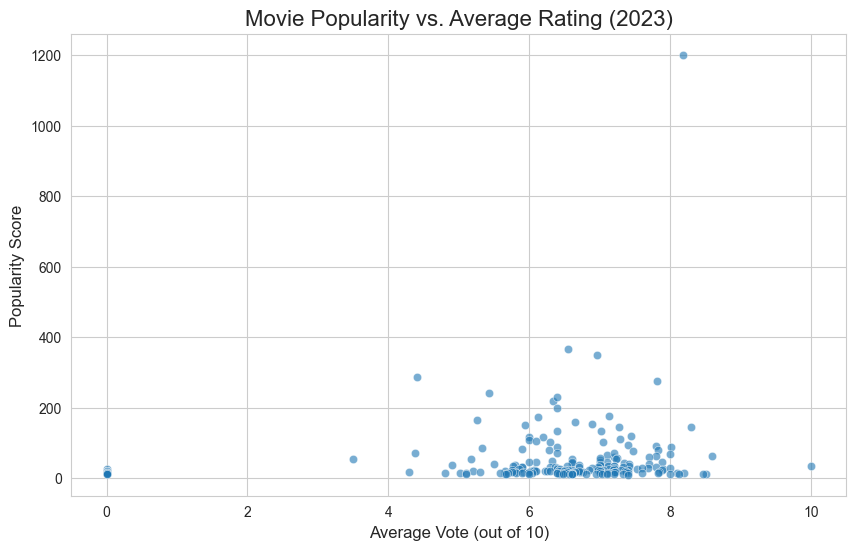

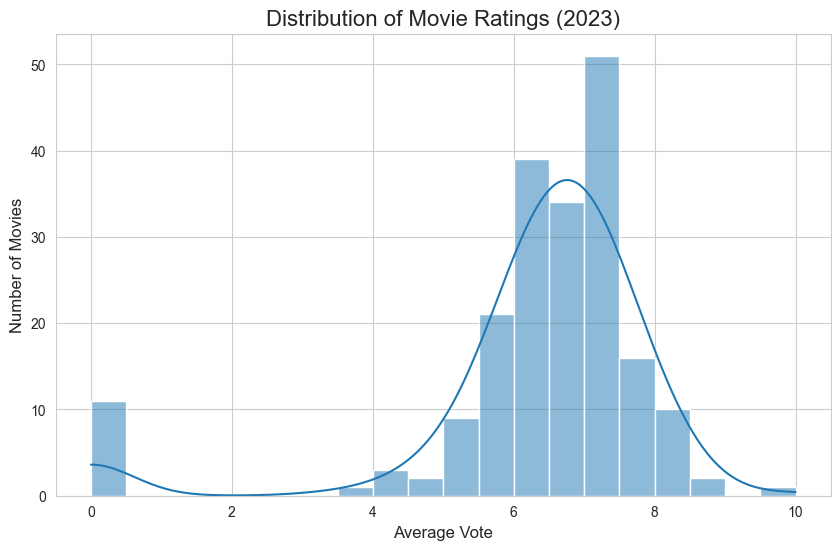

/var/folders/tl/wvx1w69n1kl_mq7zm1th1fb00000gn/T/ipykernel_59224/2573188443.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_popular, x='popularity', y='title', palette='mako')


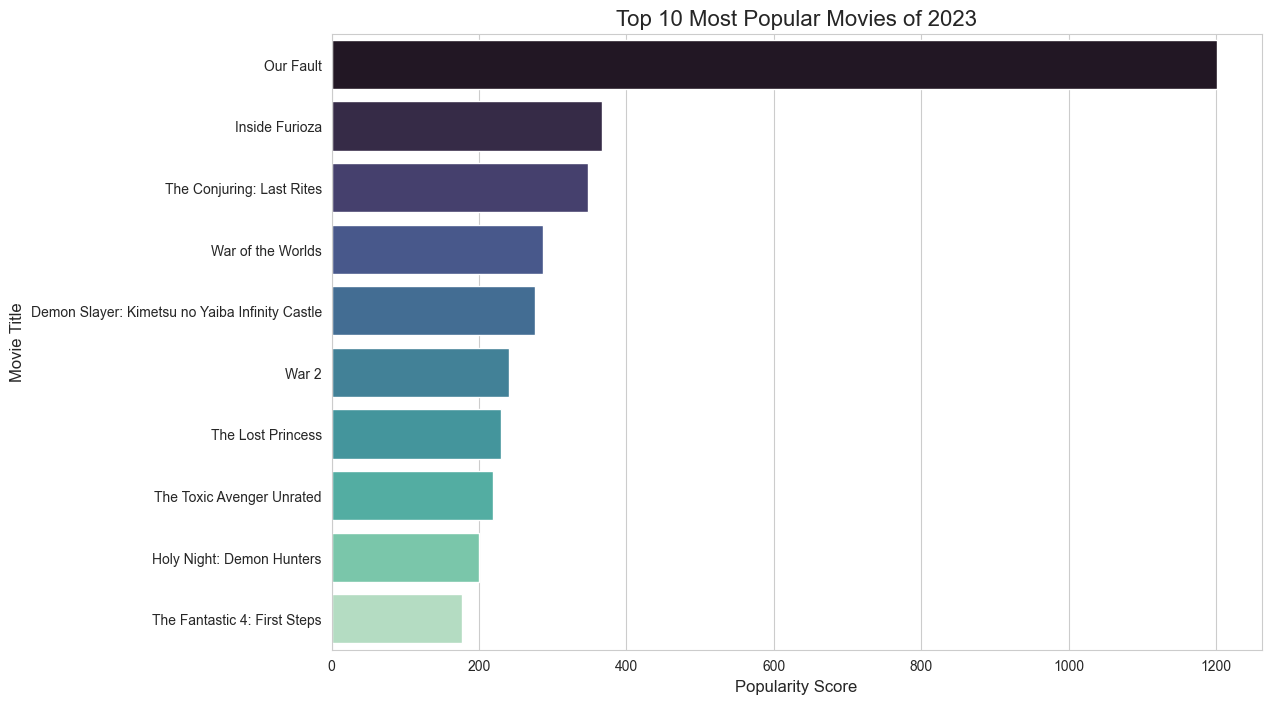

In [ ]:
# --- Visualization 1: Scatter Plot of Popularity vs. Rating ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tmdb_df, x='vote_average', y='popularity', alpha=0.6)
plt.title('Movie Popularity vs. Average Rating', fontsize=16)
plt.xlabel('Average Vote (out of 10)', fontsize=12)
plt.ylabel('Popularity Score', fontsize=12)
plt.show()

# --- Visualization 2: Histogram of Movie Ratings ---
plt.figure(figsize=(10, 6))
sns.histplot(tmdb_df['vote_average'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings', fontsize=16)
plt.xlabel('Average Vote', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.show()

# --- Visualization 3: Top 10 Most Popular Movies ---
top_10_popular = tmdb_df.sort_values('popularity', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_popular, x='popularity', y='title', palette='mako', hue='title', legend=False)
plt.title('Top 10 Most Popular Movies', fontsize=16)
plt.xlabel('Popularity Score', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.show()